# Mysterium Cosmographicum

In [6]:
from src.astroufcg.astronomy import setup
setup(path="../data/skyfield", ephem_file="de440.bsp")

In [7]:
from src.astroufcg.astronomy import make_observer, eph, ts, terra, sol
import osmnx as ox
import pandas as pd
import numpy as np


In [8]:
marte = eph['MARS BARYCENTER']

In [89]:
site_01 = "Alexandria, Egypt"
location = pd.DataFrame([list(ox.geocode(site_01))], columns=["lat", "lon"]).iloc[0]
#observer = make_observer(location)
observer = terra 
times = ts.utc(1600, 1, 1, np.arange(365*15*60*24))


In [90]:
observer = terra
marte_obs = observer.at(times).observe(marte)
sol_obs = observer.at(times).observe(sol)



KeyboardInterrupt: 

In [ ]:
ra_marte, dec_marte, _ = marte_obs.radec()
ra_sol, dec_sol, _ = sol_obs.radec()
lines = np.rollaxis(np.array([[ra_marte.degrees, dec_marte.degrees], [ra_sol.degrees, dec_sol.degrees]]), 1)

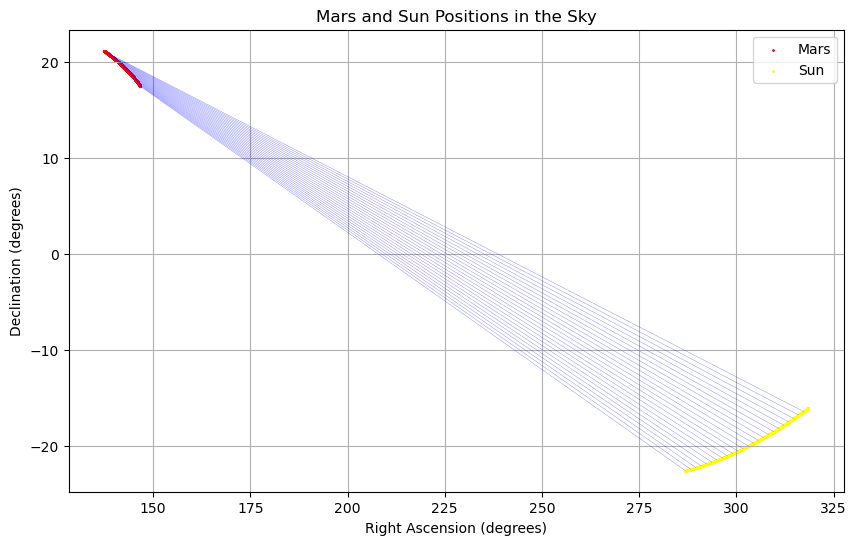

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
fig, ax = plt.subplots(figsize=(10, 6))
step = 30
ax.scatter(
    ra_marte.degrees, dec_marte.degrees, label="Mars", color="red", s=1
)
ax.scatter(
    ra_sol.degrees, dec_sol.degrees, label="Sun", color="yellow", s=1
)
linecollection = LineCollection(lines.T[:720:step], colors='blue', linewidths=0.3, alpha=0.5)
ax.add_collection(linecollection)
ax.set_xlabel('Right Ascension (degrees)')
ax.set_ylabel('Declination (degrees)')
ax.set_title('Mars and Sun Positions in the Sky')
ax.legend()
plt.grid()
plt.show()

In [ ]:
np.diff(np.where(np.abs(lat.degrees) < 0.00)[0])

array([], dtype=int64)